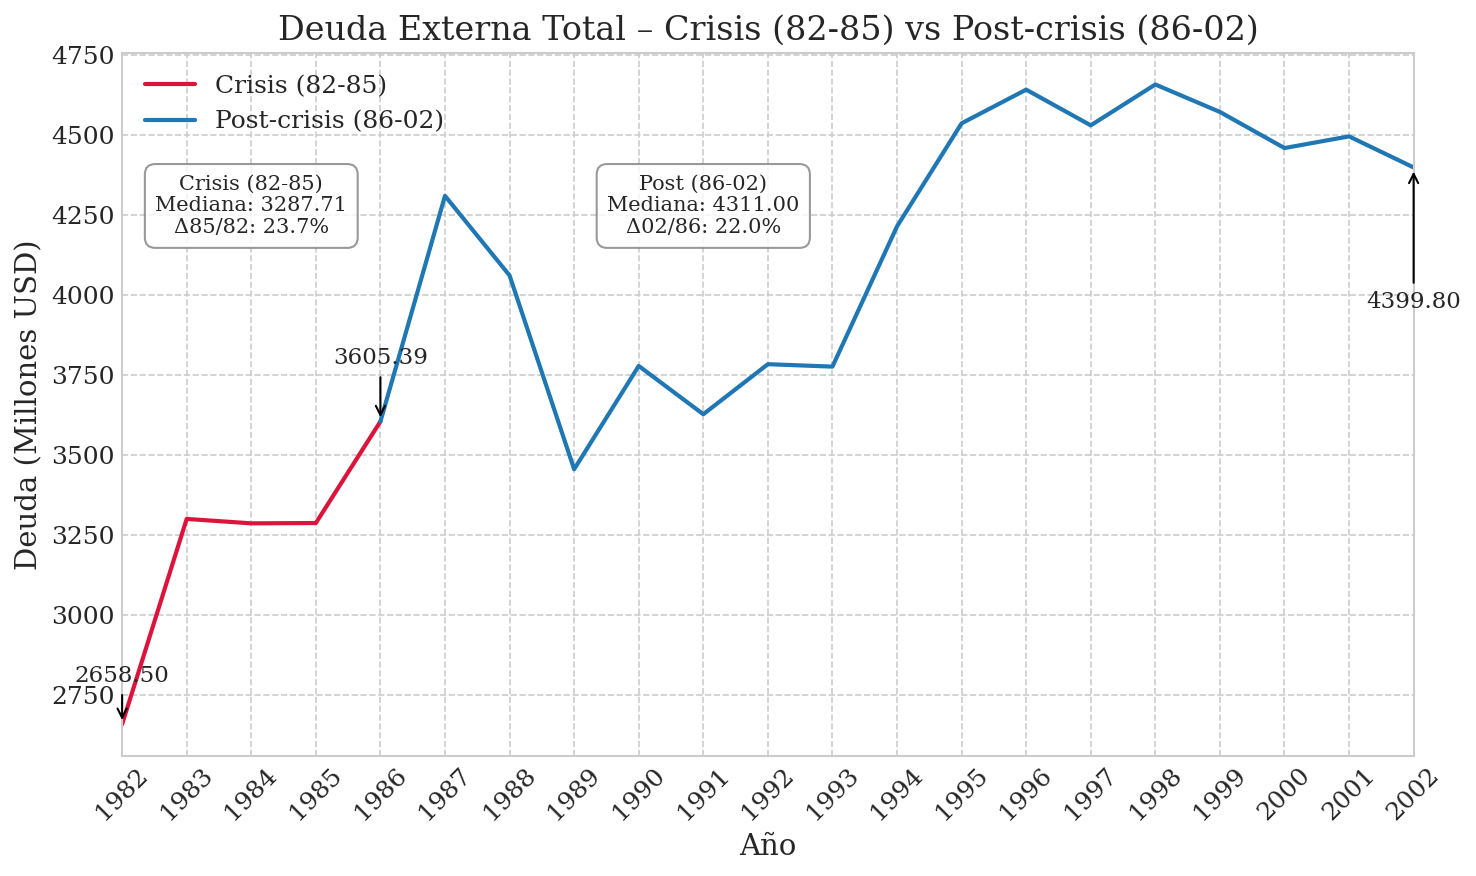

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3, os

# ── Parámetros generales ──────────────────────────────────────────────────────
OUTPUT_DIR = "../../../assets/tesis/neoliberalismo/serie_completa"
os.makedirs(OUTPUT_DIR, exist_ok=True)

CRISIS_YEARS = slice(1982, 1986)   # 1982‑1985 inclusive
POST_YEARS   = slice(1986, 2002)   # 1986‑2002 inclusive

# ── Estilo profesional ────────────────────────────────────────────────────────
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams.update({
    "font.family": "serif", "font.size": 12,
    "axes.titlesize": 16, "axes.labelsize": 14,
    "grid.linestyle": "--", "lines.linewidth": 2,
    "figure.dpi": 150, "savefig.bbox": "tight"
})

# ── Conexión y carga de datos ─────────────────────────────────────────────────
with sqlite3.connect("../../../db/proyectomacro.db") as conn:
    # Sustituye la tabla por la que necesites analizar
    df = pd.read_sql_query("SELECT * FROM deuda_externa_total", conn)

df.set_index("año", inplace=True)
df = df.loc[1982:2002]                           # segundo periodo completo

# ── Funciones de estadística de apoyo ─────────────────────────────────────────
def cuadro_crisis(s):
    med   = s.median()
    delta = (s.loc[1985] - s.loc[1982]) / s.loc[1982] * 100
    return f"Crisis (82‑85)\nMediana: {med:.2f}\nΔ85/82: {delta:.1f}%"

def cuadro_post(s):
    med   = s.median()
    delta = (s.loc[2002] - s.loc[1986]) / s.loc[1986] * 100
    return f"Post (86‑02)\nMediana: {med:.2f}\nΔ02/86: {delta:.1f}%"

# ── Texto de cuadros ──────────────────────────────────────────────────────────
text_crisis = cuadro_crisis(df.loc[CRISIS_YEARS, "deuda"])
text_post   = cuadro_post(df.loc[POST_YEARS,   "deuda"])

# ── Gráfica única: Crisis vs Post‑Crisis (1982‑2002) ──────────────────────────
fig, ax = plt.subplots(figsize=(10, 6))

# Segmentos con colores distintos
ax.plot(df.loc[CRISIS_YEARS, "deuda"], color="crimson", label="Crisis (82‑85)")
ax.plot(df.loc[POST_YEARS,   "deuda"], color="#1f77b4", label="Post‑crisis (86‑02)")

# Anotaciones clave
for yr in [1982, 1986, 2002]:
    val = df.loc[yr, "deuda"]
    offset = val * 1.05 if yr != 2002 else val * 0.90
    ax.annotate(f"{val:.2f}", xy=(yr, val), xytext=(yr, offset),
                ha="center", fontsize=11,
                arrowprops=dict(arrowstyle="->"))

# Cuadros estadísticos
bbox = dict(boxstyle="round,pad=0.5", facecolor="white", edgecolor="gray", alpha=0.8)
ax.text(1984, df["deuda"].max()*0.90, text_crisis, fontsize=10, bbox=bbox, ha="center")
ax.text(1991,   df["deuda"].max()*0.90, text_post,   fontsize=10, bbox=bbox, ha="center")

# Formato final
ax.set_title("Deuda Externa Total – Crisis (82‑85) vs Post‑crisis (86‑02)")
ax.set_xlabel("Año")
ax.set_ylabel("Deuda (Millones USD)")
ax.set_xlim(1982, 2002)
ax.legend()
plt.xticks(range(1982, 2003), rotation=45)
plt.tight_layout()

# ── Guardar ──────────────────────────────────────────────────────────────────
plt.savefig(os.path.join(OUTPUT_DIR, "deuda_externa_82_02.png"), dpi=300)
plt.show()
plt.close(fig)
